<a href="https://colab.research.google.com/github/bruno353/Data_Science_Projects/blob/main/Projeto_Portf%C3%B3lio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Portfólio
O desafio e os dados desse projeto foram retirados do site: https://sejaumdatascientist.com/projeto-de-data-science-diagnostico-precoce-de-doencas-cardiovasculares/

o dataset: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

Nesse projeto, fomos contratados por uma empresa  privada de saúde que tem o objetivo de criar um algoritmo capaz de oferecer um diagnóstico precoce de uma doença vascular. Atualmente, a predição é feita por médicos, com uma acurácia de 55% a 65%. O cliente paga 500 reais a cada 5% de acurácia acima de 50%. Por exemplo, para uma precisão de 55%, o diagnóstico custa R$500,00 para o cliente.

O nosso objetivo, como o Cientista de Dados contratado pela empresa, é criar uma ferramenta que aumente a precisão e a estabilidade do diagnóstico, trazendo um maior lucro à empresa. 

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [42]:
df.drop(['id'],axis = 1, inplace = True)

###Visualização Gráficos:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd301f62590>,
      dtype=object)

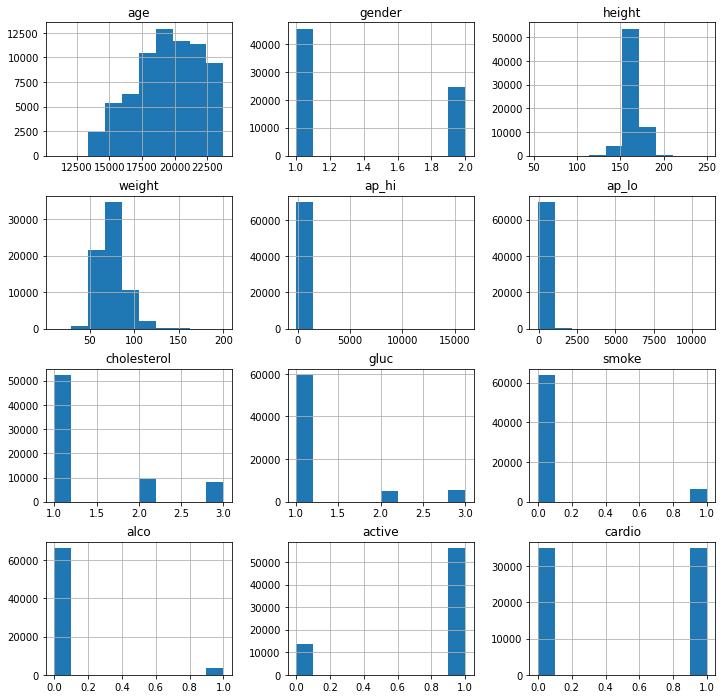

In [5]:
df.hist(figsize = (12,12))


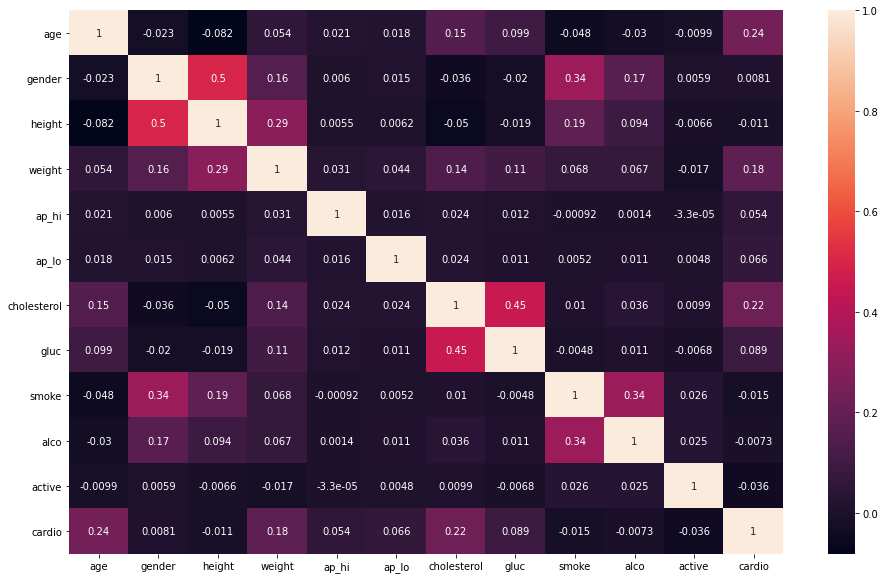

In [6]:
#gráfico de correlação
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True)


a maior correlação entre a doença cardíaca é a idade e o colesterol.

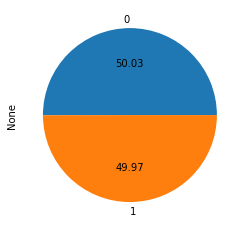

In [7]:
df.groupby('cardio').size().plot(kind='pie', autopct='%.2f')


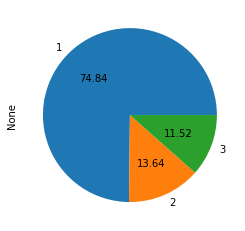

In [8]:
df.groupby('cholesterol').size().plot(kind='pie', autopct='%.2f')


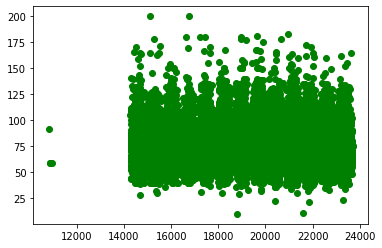

In [11]:
%matplotlib inline
plt.scatter(df.age,df.weight, color = 'green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


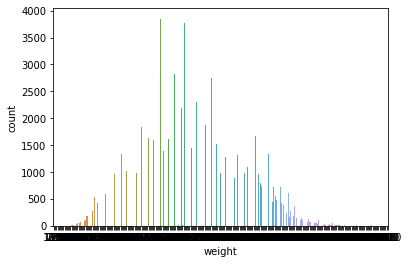

In [14]:
#contagem:
sns.countplot(df['weight'])

##Limpeza Dados

In [18]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#verificação de valores com Na
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cardio,0,0.0
active,0,0.0
alco,0,0.0
smoke,0,0.0
gluc,0,0.0
cholesterol,0,0.0
ap_lo,0,0.0
ap_hi,0,0.0
weight,0,0.0
height,0,0.0


In [22]:
df.value_counts()

age    gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
16793  1       165     68.0    120    80     1            1     0      0     1       0         2
21778  1       160     58.0    120    80     1            1     0      0     1       0         2
19858  1       165     68.0    120    80     1            1     0      0     1       0         2
18955  1       165     75.0    120    80     1            1     0      0     1       1         2
20516  1       164     66.0    120    80     1            1     0      0     0       0         2
                                                                                              ..
20949  1       161     85.0    120    80     1            1     0      0     1       0         1
               160     79.0    140    85     2            1     0      0     1       1         1
               158     91.0    140    90     3            3     0      0     0       0         1
               150     90.0    120 

In [23]:
for col in df:
	print(f'{col}: {df[col].unique()}')

age: [18393 20228 18857 ... 14925 17727 17926]
gender: [2 1]
height: [168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182  76 149 142 150 144 147 186 146 141 195 140 198 145 143 196 138
 194 190 134 136 100 120 189 137 192 122 250 191 117  70  97 119 130 110
 193  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64
  91  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99
  57]
weight: [ 62.    85.    64.    82.    56.    67.    93.    95.    71.    68.
  80.    60.    78.   112.    75.    52.    83.    69.    90.    45.
  65.    59.    66.    74.   105.    73.    55.    70.    72.    63.
  50.   107.    84.    77.    79.    76.    58.   115.    97.    53.
  57.    49.   110.    94.    92.    87.   103.    88.    99.   100.
  61.    48.    54.    51.    47.    91.   104.    81.    98.   108.
  89.   101.    86.    65.5  142.    96.    44.    41.   169.   1

In [43]:
#verificação de outliers:
#quero tirar valores de peso e altura em que o quantile seja menor que 0.05 e maior que 0.95
min_thresold, max_thresold = df.weight.quantile([0.05, 0.95])
min_thresold, max_thresold
df = df[(df.weight<max_thresold) & (df.weight>min_thresold)]


In [44]:
min_thresold, max_thresold = df.height.quantile([0.05, 0.95])
min_thresold, max_thresold
df = df[(df.height<max_thresold) & (df.height>min_thresold)]


In [26]:
#vendo o skew
from scipy.stats import skew
for col in df:
    print(skew(df[col]))

-0.30546752584969594
0.6533220453748914
0.01313384846006273
0.47739562690108134
92.57250838192188
32.76563800725974
1.6526387926638288
2.458527071646082
2.9908569547710497
4.045794332797786
-1.538184811924593
0.014989251389858052


##Treinamento e modelagem

In [45]:
X = df.drop('cardio', axis = 1)
y = df['cardio']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics  import accuracy_score,classification_report,roc_auc_score,plot_roc_curve,plot_precision_recall_curve

logreg=Pipeline([('logistic',LogisticRegression())])
decision=Pipeline([('dt',DecisionTreeClassifier())])
randomforest=Pipeline([('rf',RandomForestClassifier())])
naivebayes=Pipeline([('nb',GaussianNB())])
knn=Pipeline([('knn',KNeighborsClassifier())])
gbc=Pipeline([('gbc',GradientBoostingClassifier())])
adaboost=Pipeline([('adaboost',AdaBoostClassifier())])
sgdclassifier=Pipeline([('SGDclassifier',SGDClassifier())])
svc=Pipeline([('svc',SVC())])
mlpclass=Pipeline([('mlpc',MLPClassifier())])
mypipeline1=[logreg,decision,randomforest,naivebayes,knn,gbc,adaboost,sgdclassifier,svc,mlpclass]
pipelinedict1={0:'logistic',1:'dt',2:'rf',3:'nb',4:'knn',5:'gbc',6:'adaboost',7:'SGDclassifier',
              8:'svc',9:'mlpc'}
for i in mypipeline1:
    i.fit(X_train,y_train)
model_score=[]
model_name=[]
for i,j in enumerate(mypipeline1):
    print("{} test accuracy: {}".format(pipelinedict1[i],j.score(X_test,y_test)))
    model_name.append(pipelinedict1[i])
    model_score.append(j.score(X_test,y_test))

logistic test accuracy: 0.7196800461194782
dt test accuracy: 0.6332780860416517
rf test accuracy: 0.7064206961158752
nb test accuracy: 0.5892483966275132
knn test accuracy: 0.638682712401816
gbc test accuracy: 0.733587951286301
adaboost test accuracy: 0.7269582762844995
SGDclassifier test accuracy: 0.7165813936729841
svc test accuracy: 0.7232831303595878
mlpc test accuracy: 0.7294804352525762


#Conclusão
Como analisados em outros modelos já criados com esse dataset, conseguiu-se uma acurácia de 73%(GradientBoostingClassifier), o que, se for analisado no site de onde foi conseguido os dados, é um bom modelo.

Questão Financeira: Enquanto, anteriormente, o lucro da empresa seria, em média, de 1000,00 reais, agora o lucro teria uma média de 2000,00 reais, sem contar a  estabilidade garantida pelo algoritmo